# Capstone - Classifying plastic resin codes for recycling

# Making Predictions using saved model

## Imports and dependencies

In [4]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# imports for metrics
from tensorflow.keras.metrics import Metric
import tensorflow as tf
tf.keras import utils

# imports for model
from tensorflow.keras.models import load_model # to load model from saved file earlier
from tensorflow.keras.preprocessing import image # to do image processing in the required format for predictions
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenetv3l_preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as efficientnetv2_preprocess_input

In [2]:
class F1Score(Metric):
    def __init__(self, threshold=0.5, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.threshold = threshold
        self.precision = tf.keras.metrics.Precision(threshold)
        self.recall = tf.keras.metrics.Recall(threshold)
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.cast(y_pred >= self.threshold, tf.float32)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)
    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

In [3]:
# Load the saved model
trf_model = load_model('dropout_eff_netv2m_epoch_07_0.81_0.79.h5', custom_objects={'F1Score': F1Score})

## Single image prediction

In [5]:
# Step 1: Load an image for prediction into Python
image_name = 'IMG_4188'
imported_image = Image.load_img(f'./data/test_binary/{image_name}.jpg', target_size=(224, 224)) # we've saved one image on this path (image of a dog) that we can load using image class

# step 2: Convert the image to a matrix of numbers to feed into model
imported_image = Image.img_to_array(imported_image) 
test_image = efficientnetv2_preprocess_input(imported_image) 
test_image = np.expand_dims(imported_image, axis=0) 

# Step 3: to pre-process inputs to be in the same format expected by MobileNetV3


AttributeError: module 'PIL.Image' has no attribute 'load_img'

Note on `np.expand_dims`: Tensorflow and Pytorch normally work on batches of images because it's more efficient than working on one at a time. So, even if for 1 image, it needs to be padded with a 'batch' of just that one image. `np.expand_dims` helps to accomplish this.

1/1 [==============================] - 0s 176ms/step
[[0.3475902]]


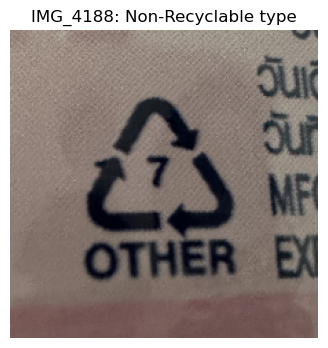

In [7]:
# step 4: Make predictions
predictions = trf_model.predict(test_image)
print(predictions)

# Step 5: Convert  probability to actual 'class' predictions
result = ['Recyclable' if prob[0]>0.5 else 'Non-Recyclable' for prob in predictions]

# Step 6: Display the image with classifications
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(imported_image.astype(np.uint8))
plt.title(f"{image_name}: {result[0]} type")
plt.show()

In [8]:
#define folder path
test_folder = './data/test_binary'

1/1 [==============================] - 0s 163ms/step


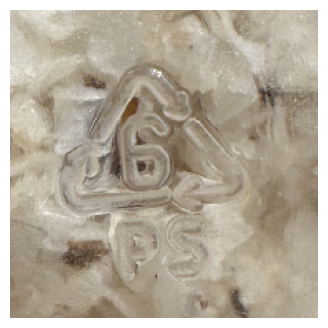

IMG_4173.JPG: Non-Recyclable type
1/1 [==============================] - 0s 164ms/step


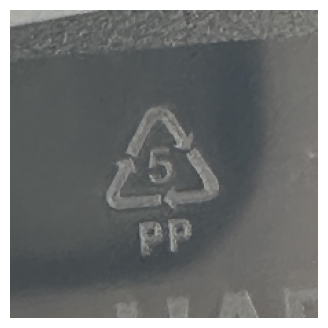

IMG_4176.JPG: Recyclable type
1/1 [==============================] - 0s 150ms/step


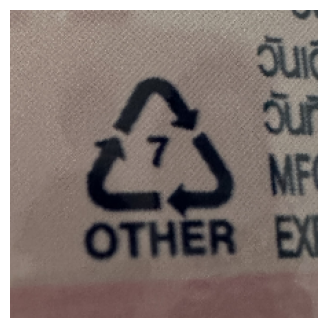

IMG_4188.JPG: Non-Recyclable type
1/1 [==============================] - 0s 158ms/step


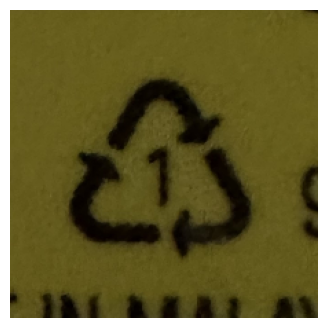

IMG_4189.JPG: Recyclable type
1/1 [==============================] - 0s 151ms/step


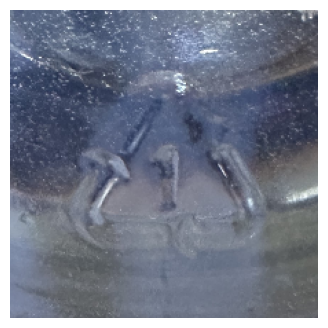

IMG_4195.JPG: Recyclable type
1/1 [==============================] - 0s 154ms/step


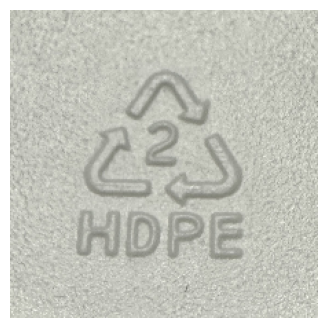

IMG_4197.JPG: Recyclable type
1/1 [==============================] - 0s 148ms/step


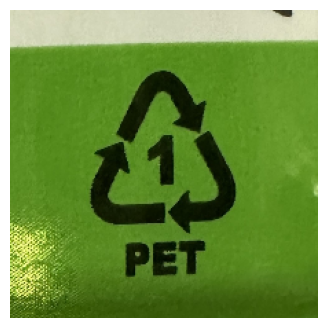

IMG_4198.JPG: Recyclable type
1/1 [==============================] - 0s 152ms/step


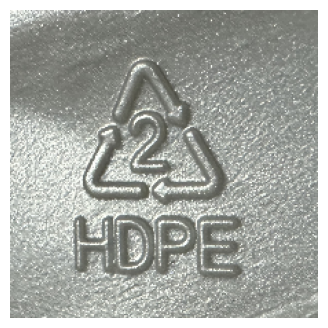

IMG_4199.JPG: Recyclable type
1/1 [==============================] - 0s 151ms/step


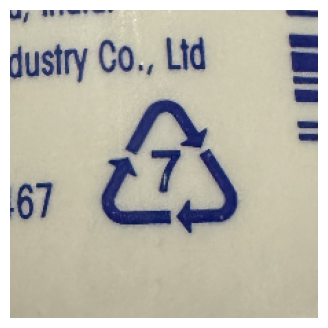

IMG_4201.JPG: Non-Recyclable type
1/1 [==============================] - 0s 153ms/step


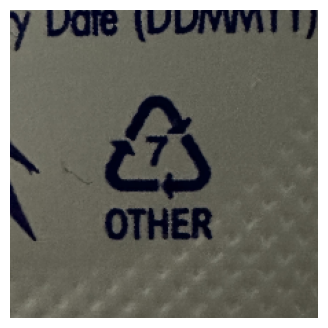

IMG_4202.JPG: Non-Recyclable type
1/1 [==============================] - 0s 154ms/step


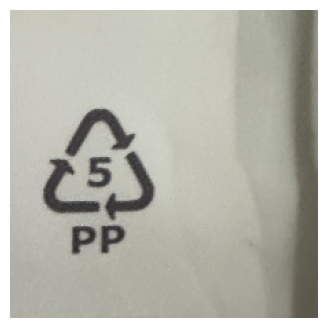

IMG_4204.JPG: Recyclable type
1/1 [==============================] - 0s 147ms/step


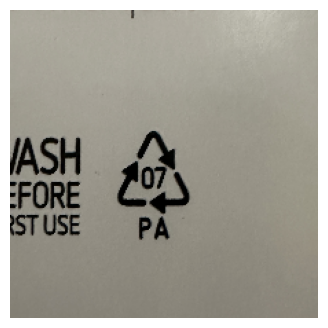

IMG_4205.JPG: Non-Recyclable type
1/1 [==============================] - 0s 154ms/step


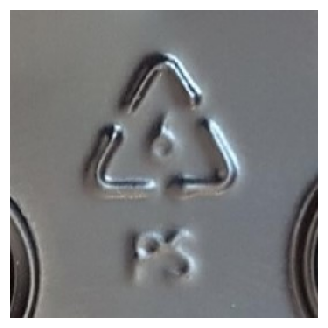

IMG_4206.JPG: Non-Recyclable type
1/1 [==============================] - 0s 149ms/step


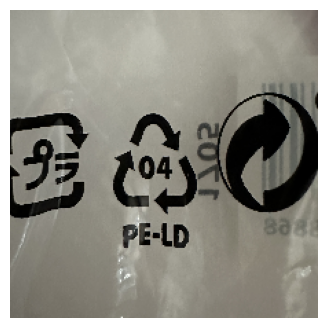

IMG_4211.JPG: Non-Recyclable type
1/1 [==============================] - 0s 150ms/step


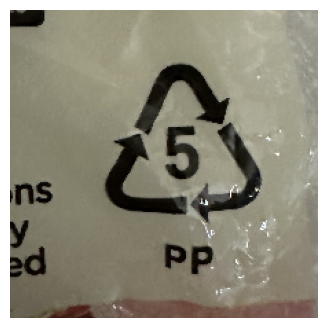

IMG_4212.JPG: Recyclable type
1/1 [==============================] - 0s 153ms/step


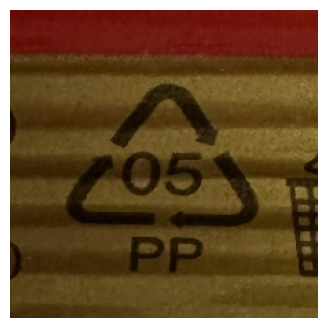

IMG_4213.JPG: Recyclable type
1/1 [==============================] - 0s 155ms/step


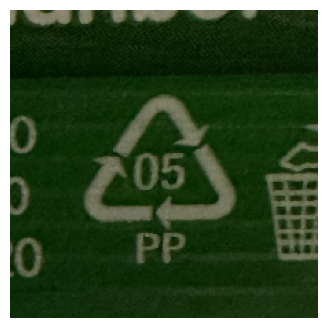

IMG_4214.JPG: Recyclable type
1/1 [==============================] - 0s 159ms/step


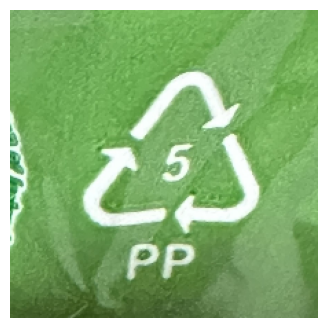

IMG_4215.JPG: Recyclable type
1/1 [==============================] - 0s 150ms/step


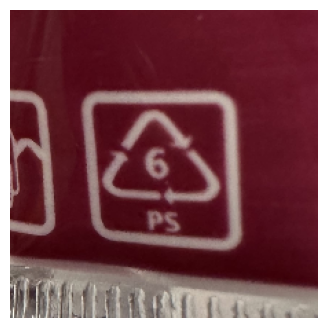

IMG_4235.JPG: Non-Recyclable type
1/1 [==============================] - 0s 172ms/step


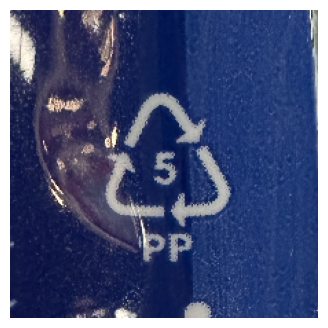

IMG_4237.JPG: Recyclable type
1/1 [==============================] - 0s 146ms/step


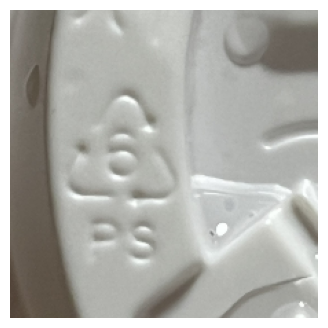

IMG_8773 (2).JPG: Non-Recyclable type
1/1 [==============================] - 0s 155ms/step


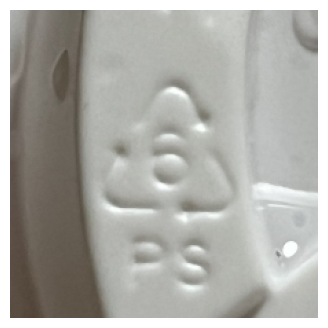

IMG_8773.JPG: Non-Recyclable type


In [9]:
num_images = len([file for file in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, file))])

for image_name in os.listdir(test_folder):
    if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = image.load_img(os.path.join(test_folder, image_name), target_size=(224, 224))
        img = image.img_to_array(img)
        img = efficientnetv2_preprocess_input(img) 
        img = np.expand_dims(img, axis=0)  # Add batch dimension


        # predict using the model loaded
        predictions = trf_model.predict(img) 
        # classifying based on probability
        result = ['Recyclable' if prob[0]>0.5 else 'Non-Recyclable' for prob in predictions]
        #visualise and return
        plt.figure(figsize=(4, 4))
        plt.axis('off')
        plt.imshow(img[0].astype(np.uint8))
        plt.show();
        print(f"{image_name}: {result[0]} type")

Predictions not 100% accurate which is expected since the model score is only 80%